# 🛡️ Credit Card Fraud Detection using TensorFlow

## 👨‍💻 About Me  
**Name:** Ritesh Kaushik  
🔗 [LinkedIn](https://www.linkedin.com/in/riteshkaushik18) | 🐙 [GitHub](https://github.com/riteshkaushikbr)

## 📌 Project Overview  
This project focuses on identifying **fraudulent credit card transactions** using deep learning techniques with **TensorFlow**. Fraud detection plays a crucial role in the financial sector, helping institutions reduce losses and enhance trust by proactively detecting suspicious activity.

The dataset consists of real-world credit card transactions, each labeled as either legitimate or fraudulent.

## 🧰 Tools & Technologies Used  
- **Programming Language:** Python  
- **Framework:** TensorFlow (Deep Learning)  
- **Libraries:** Pandas, NumPy, Matplotlib, Seaborn  
- **Machine Learning Techniques:** Binary Classification, Class Imbalance Handling  
- **Model Evaluation Metrics:** ROC AUC Score, Precision-Recall Curve, F1 Score  

## 🎯 Objective  
To develop a robust and efficient classification model capable of accurately detecting fraudulent transactions. The model should effectively generalize on unseen data while minimizing both false positives and false negatives, which are critical in financial fraud detection scenarios.

---





# Import Libraries

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

# Classifier Libraries

import tensorflow as tf

# Other Libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, precision_recall_curve, auc, f1_score

# Load and explore data

In [3]:
# Read data
df = pd.read_csv(r"C:\Users\rites\Downloads\archive\creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [6]:
# View which columns are categorical
df.describe().select_dtypes(exclude=['int', 'float']).columns

Index([], dtype='object')

In [7]:
#check for missing values
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [8]:
# How many rows are in our dataset?
len(df)

284807

In [9]:
# How many columns are in our dataset?
len(df.columns)

31

In [10]:
df.shape

(284807, 31)

In [11]:
# print fraud transaction details
print (df.Time[df.Class == 1].describe())

count       492.000000
mean      80746.806911
std       47835.365138
min         406.000000
25%       41241.500000
50%       75568.500000
75%      128483.000000
max      170348.000000
Name: Time, dtype: float64


In [12]:
# print normal transaction details
print (df.Time[df.Class == 0].describe())

count    284315.000000
mean      94838.202258
std       47484.015786
min           0.000000
25%       54230.000000
50%       84711.000000
75%      139333.000000
max      172792.000000
Name: Time, dtype: float64


C:\Users\rites\AppData\Local\Temp\ipykernel_10644\875435412.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(amount_val, ax=ax[0], color='red')
C:\Users\rites\AppData\Local\Temp\ipykernel_10644\875435412.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(time_val, ax=ax[1], color='blue')


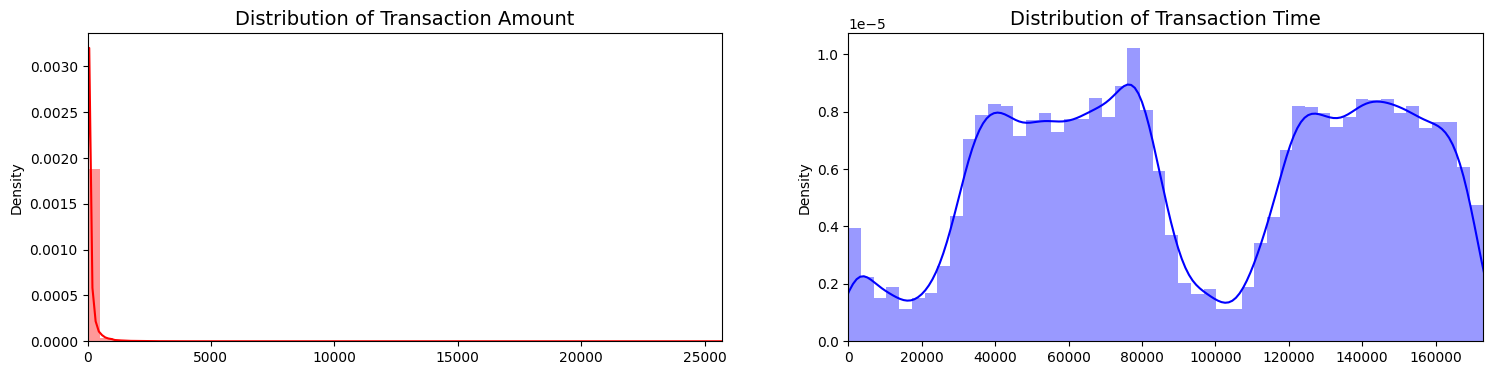

In [13]:
fig, ax = plt.subplots(1, 2, figsize=(18,4))

amount_val = df['Amount'].values
time_val = df['Time'].values

sns.distplot(amount_val, ax=ax[0], color='red')
ax[0].set_title('Distribution of Transaction Amount', fontsize=14)
ax[0].set_xlim([min(amount_val), max(amount_val)])

sns.distplot(time_val, ax=ax[1], color='blue')
ax[1].set_title('Distribution of Transaction Time', fontsize=14)
ax[1].set_xlim([min(time_val), max(time_val)])

plt.show()

C:\Users\rites\AppData\Local\Temp\ipykernel_10644\4219586165.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(fraud_val, ax=ax[0], color='red')
C:\Users\rites\AppData\Local\Temp\ipykernel_10644\4219586165.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(normal_val, ax=ax[1], color='green'

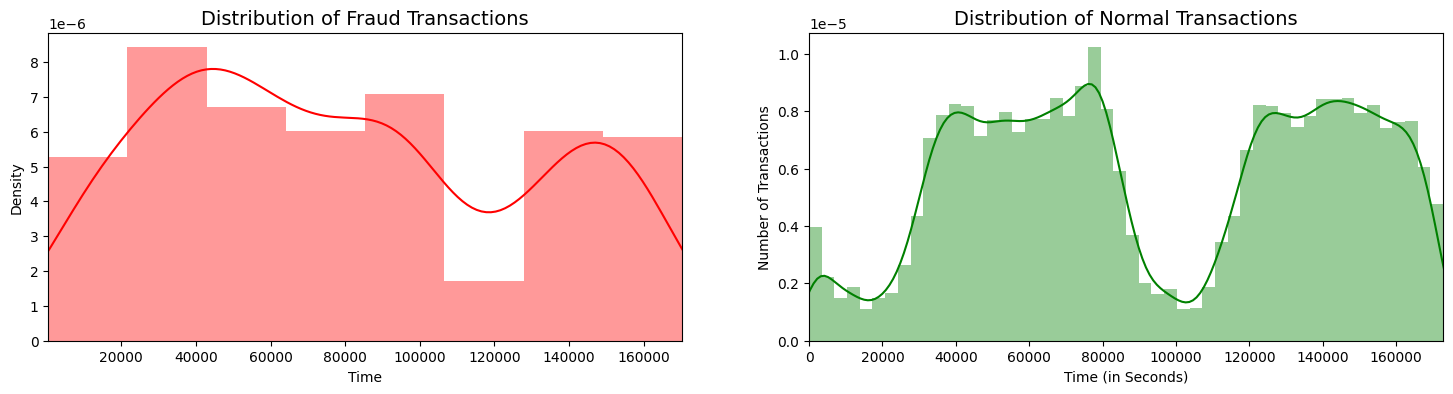

In [14]:
fig, ax = plt.subplots(1, 2, figsize=(18,4))

fraud_val = df.Time[df.Class == 1]
normal_val = df.Time[df.Class == 0]

sns.distplot(fraud_val, ax=ax[0], color='red')
ax[0].set_title('Distribution of Fraud Transactions', fontsize=14)
ax[0].set_xlim([min(fraud_val), max(fraud_val)])

sns.distplot(normal_val, ax=ax[1], color='green')
ax[1].set_title('Distribution of Normal Transactions', fontsize=14)
ax[1].set_xlim([min(normal_val), max(normal_val)])

plt.xlabel('Time (in Seconds)')
plt.ylabel('Number of Transactions')
plt.show()

C:\Users\rites\AppData\Local\Temp\ipykernel_10644\1208753061.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(fraud_amt, ax=ax[0], color='red')
C:\Users\rites\AppData\Local\Temp\ipykernel_10644\1208753061.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(normal_amt, ax=ax[1], color='green'

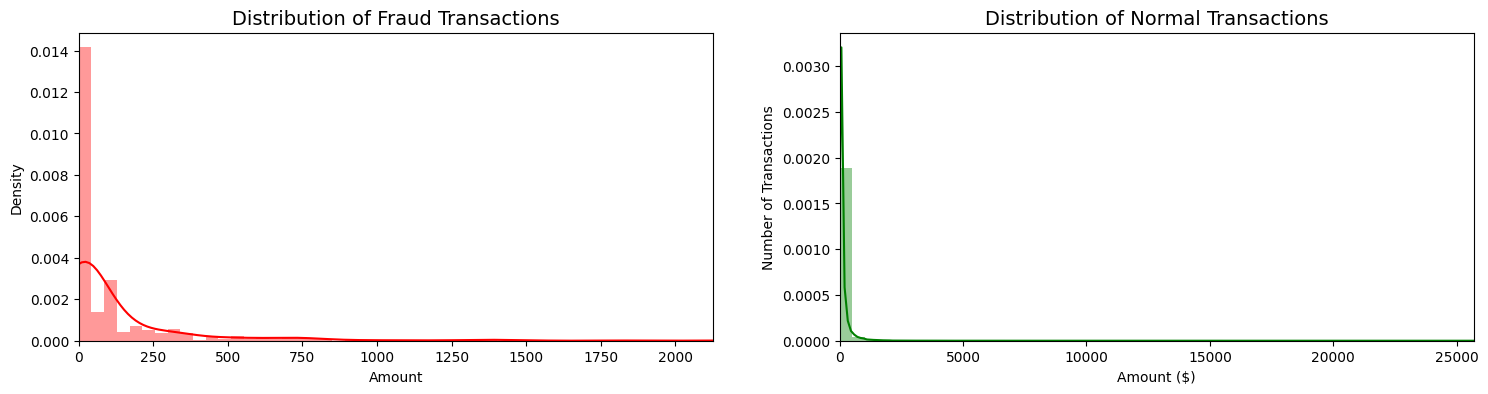

In [15]:
fig, ax = plt.subplots(1, 2, figsize=(18,4))

fraud_amt = df.Amount[df.Class == 1]
normal_amt = df.Amount[df.Class == 0]

sns.distplot(fraud_amt, ax=ax[0], color='red')
ax[0].set_title('Distribution of Fraud Transactions', fontsize=14)
ax[0].set_xlim([min(fraud_amt), max(fraud_amt)])

sns.distplot(normal_amt, ax=ax[1], color='green')
ax[1].set_title('Distribution of Normal Transactions', fontsize=14)
ax[1].set_xlim([min(normal_amt), max(normal_amt)])

plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.show()

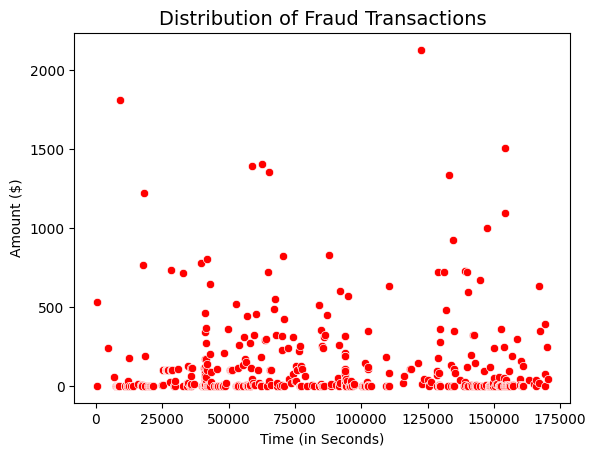

In [16]:
ax = sns.scatterplot(data=df,x= df.Time[df.Class == 1], y= df.Amount[df.Class == 1], color='red')
ax.set_title('Distribution of Fraud Transactions', fontsize=14)

plt.xlabel('Time (in Seconds)')
plt.ylabel('Amount ($)')
plt.show()

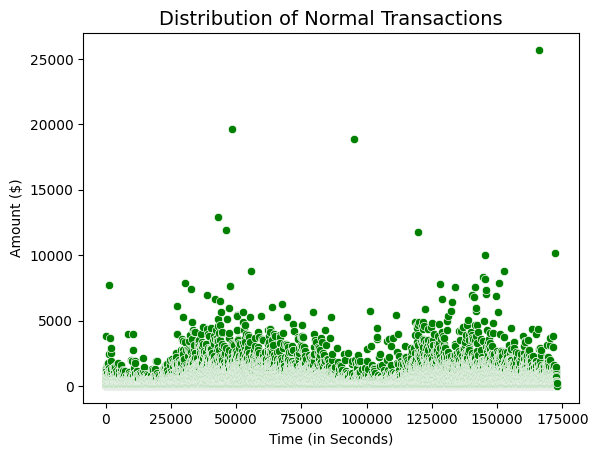

In [17]:
ax = sns.scatterplot(data=df,x= df.Time[df.Class == 0], y= df.Amount[df.Class == 0], color='green')
ax.set_title('Distribution of Normal Transactions', fontsize=14)

plt.xlabel('Time (in Seconds)')
plt.ylabel('Amount ($)')
plt.show()

In [18]:
# Shuffle the entire data set (applies to both train & test)
df = df.sample(frac=1).reset_index(drop=True)
x= df.iloc[:,:-1].values
y= df.iloc[:,-1].values

In [19]:
print(x[:3])

[[ 1.29365000e+05 -1.06560252e+00  7.50731405e-01  1.29216719e+00
  -7.01254973e-01 -1.53388170e-01  6.73606999e-01  1.22430997e-01
   7.99078808e-01 -2.48531264e-01 -1.07721135e+00  1.25564432e-01
  -1.13434655e-01 -1.23234173e+00  7.28157181e-01  5.41071887e-01
   5.91941199e-01 -6.14403521e-01  9.46956889e-01  7.20760419e-01
  -1.33902967e-02 -4.85266457e-02 -5.13487907e-01 -6.46096116e-02
   1.37091983e-01  3.24305268e-01 -4.24921583e-01 -8.91009950e-02
   6.53319814e-03  7.18600000e+01]
 [ 6.40730000e+04 -1.60140753e+00  1.94170828e-01  1.09176124e+00
   4.52040716e-02  5.98468359e-01  1.55439796e+00 -1.35837909e-01
   1.18012195e+00 -4.83806130e-01 -7.62243447e-01  1.64720051e+00
   1.29940025e+00 -3.50195357e-01  5.13104188e-01 -3.03205845e-02
  -1.34671102e+00  1.19351305e+00 -1.88298665e+00 -9.01504641e-01
   1.47487897e-01  1.12126556e-01  2.58730452e-01  1.75933654e-01
  -1.00193277e+00 -3.19587373e-01  3.46220586e-01  2.45525954e-01
   9.82257737e-03  7.61600000e+01]
 [ 1.2

In [20]:
print(y[:3])

[0 0 0]


# Creating train and test data

In [21]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=0)

# Data Preprocessing

In [22]:
from sklearn.preprocessing import StandardScaler

# creating scaler object for encoding
scaler = StandardScaler()
# applying StandardScaler on x_train and x_test
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Model Creation

In [23]:
n_inputs = x_train.shape[1]

model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(n_inputs, activation='relu',input_shape=(n_inputs,)),
  tf.keras.layers.Dense(30, activation='relu'),
  tf.keras.layers.Dense(2, activation='softmax')
])

loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
predictions = model(x_train[:1]).numpy()
loss_fn(y_train[:1], predictions).numpy()
model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])     

C:\Users\rites\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [24]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 30)                  │             930 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 30)                  │             930 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 2)                   │              62 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,922 (7.51 KB)

 Trainable params: 1,922 (7.51 KB)

 Non-trainable params: 0 (0.00 B)

In [25]:
model.fit(x_train, y_train, validation_split=0.2, batch_size=25, epochs=20, shuffle=True, verbose=2)

Epoch 1/20


C:\Users\rites\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\backend\tensorflow\nn.py:708: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


7292/7292 - 10s - 1ms/step - accuracy: 0.9991 - loss: 0.0061 - val_accuracy: 0.9993 - val_loss: 0.0042
Epoch 2/20
7292/7292 - 10s - 1ms/step - accuracy: 0.9994 - loss: 0.0031 - val_accuracy: 0.9992 - val_loss: 0.0032
Epoch 3/20
7292/7292 - 11s - 2ms/step - accuracy: 0.9994 - loss: 0.0026 - val_accuracy: 0.9994 - val_loss: 0.0036
Epoch 4/20
7292/7292 - 9s - 1ms/step - accuracy: 0.9994 - loss: 0.0024 - val_accuracy: 0.9995 - val_loss: 0.0029
Epoch 5/20
7292/7292 - 9s - 1ms/step - accuracy: 0.9995 - loss: 0.0023 - val_accuracy: 0.9995 - val_loss: 0.0034
Epoch 6/20
7292/7292 - 10s - 1ms/step - accuracy: 0.9994 - loss: 0.0022 - val_accuracy: 0.9993 - val_loss: 0.0031
Epoch 7/20
7292/7292 - 9s - 1ms/step - accuracy: 0.9995 - loss: 0.0020 - val_accuracy: 0.9995 - val_loss: 0.0036
Epoch 8/20
7292/7292 - 9s - 1ms/step - accuracy: 0.9996 - loss: 0.0019 - val_accuracy: 0.9995 - val_loss: 0.0034
Epoch 9/20
7292/7292 - 9s - 1ms/step - accuracy: 0.9996 - loss: 0.0018 - val_accuracy: 0.9995 - val_los

# Model Evaluation

In [26]:
y_pred = np.argmax(model.predict(x_test), axis=-1)

1781/1781 ━━━━━━━━━━━━━━━━━━━━ 2s 799us/step


In [27]:
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)
auc_score = auc(recall, precision)
print('PR AUC: %.3f' % auc_score)

PR AUC: 0.846


In [28]:
roc_auc = roc_auc_score(y_test, y_pred)
print('ROC AUC %.3f' % roc_auc)

ROC AUC 0.875
